#### Convolutional Neural Network

In [69]:
#source:- https://data.mendeley.com/datasets/4drtyfjtfy/1

In [8]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [13]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

In [2]:
tf.__version__

'2.0.0'

In [3]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

Using TensorFlow backend.


In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 94s 2us/step


In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('data/train/*')

In [12]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [14]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [17]:
training_set = train_datagen.flow_from_directory(r'data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1045 images belonging to 4 classes.


In [18]:

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 80 images belonging to 4 classes.


In [19]:
from tensorflow.keras.layers import Conv2D

In [21]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/4
33/33 [==============================] - 205s 6s/step - loss: 0.2583 - accuracy: 0.9254 - val_loss: 0.0592 - val_accuracy: 0.9625
Epoch 2/4
33/33 [==============================] - 211s 6s/step - loss: 0.1567 - accuracy: 0.9617 - val_loss: 0.1603 - val_accuracy: 0.9750
Epoch 3/4
33/33 [==============================] - 212s 6s/step - loss: 0.1307 - accuracy: 0.9675 - val_loss: 0.0664 - val_accuracy: 0.9750
Epoch 4/4
33/33 [==============================] - 222s 7s/step - loss: 0.0994 - accuracy: 0.9828 - val_loss: 0.0535 - val_accuracy: 0.9625


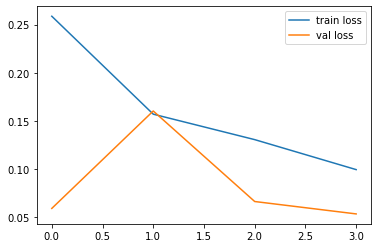

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [25]:
# save it as a h5 file


from tensorflow.keras.models import load_model
model.save('vgg_model.h5')


In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [54]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'data/test/sunrise/sunrise8.jpg',target_size =(64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [55]:

result

array([[4.1108628e-27, 4.2615807e-19, 3.3293069e-12, 1.0000000e+00]],
      dtype=float32)

In [56]:
index=np.where(result[0]==np.max(result[0]))
if index[0][0]==0:
    print("The image classified is cloudy")
elif index[0][0]==1:
    print("The image classified is Rain")
elif index[0][0]==2:
    print("The image classified is Shine")
else:
    print("The image classified is Sunrise")

The image classified is Sunrise
